# Customer Segmentation in Electric Vehicle market for India

---
Contributor : Jeetendra Sarpe


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
path = "/content/drive/My Drive/Feynn_Labs/EV_Market_Segmentation/Behavior/"
df = pd.read_csv(path+'Behavior.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [6]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [7]:
df.rename(columns={'Marrital Status':'Marital Status','Personal loan':'Car_Loan','Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [8]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(include = 'int').columns

cat_cols,num_cols

(Index(['Profession', 'Marital Status', 'Education', 'Car_Loan'], dtype='object'),
 Index(['Age', 'No of Dependents', 'Total Salary', 'EV_Price'], dtype='object'))

## Univariate Analysis:
### Categorical Variables

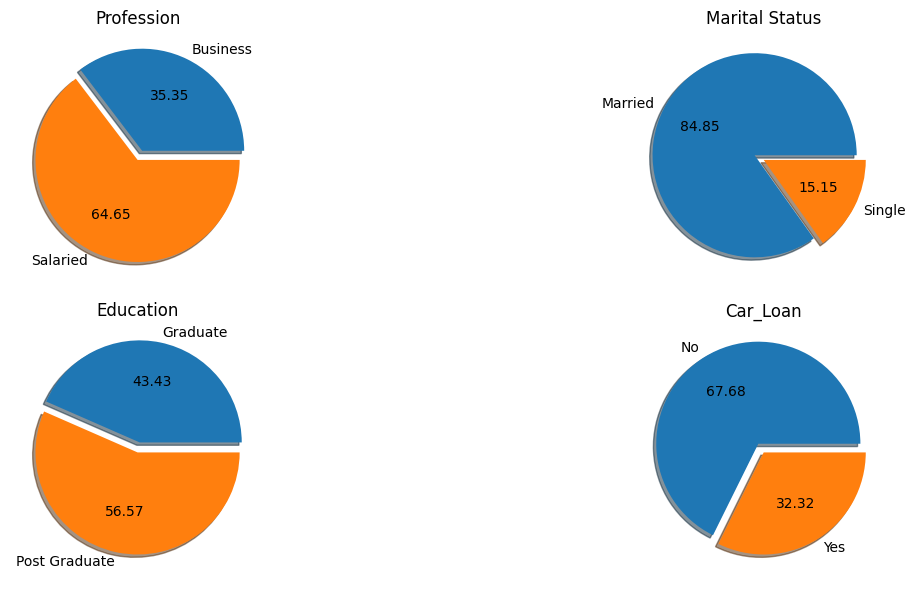

In [9]:
plt.figure(figsize = (15,6))
for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols)//2,2,i+1)
  df.groupby(cat_cols[i]).size().plot(kind='pie', autopct='%.2f',shadow = True,explode = [0.1,0])
  plt.title(cat_cols[i])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

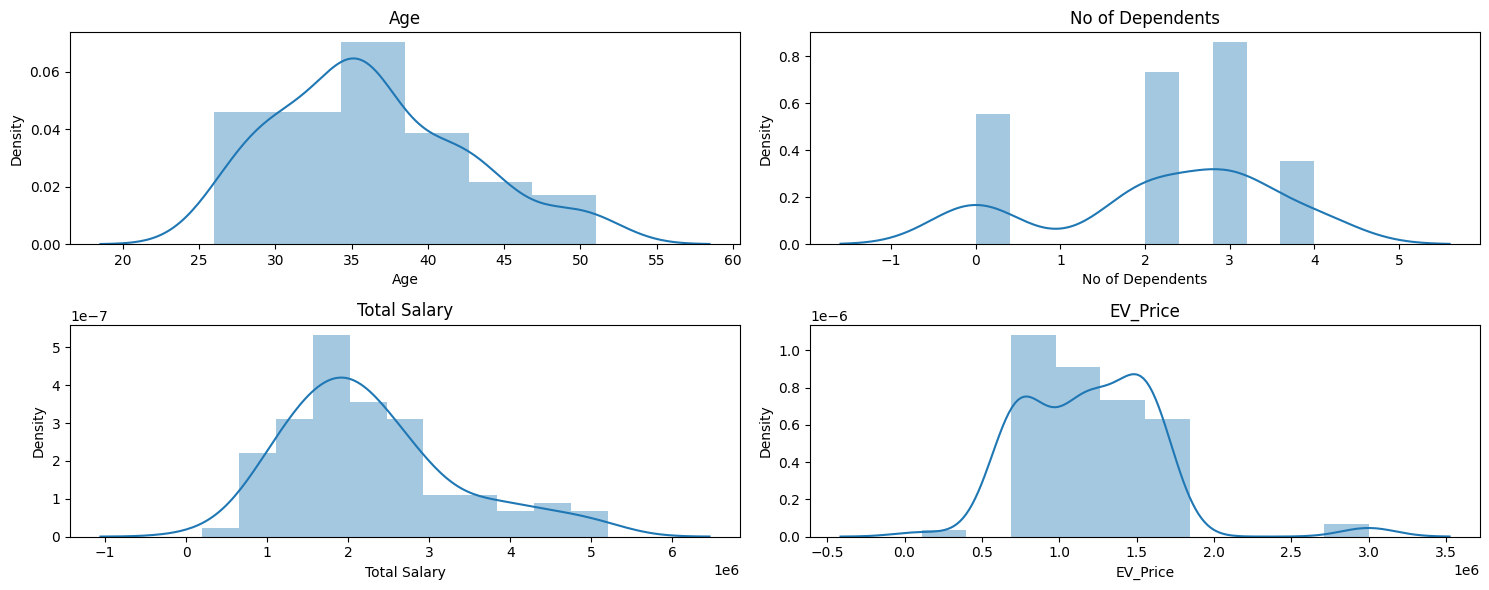

In [35]:
plt.figure(figsize = (15,6))
for i in range(len(num_cols)):
  plt.subplot(len(num_cols)//2,2,i+1)
  sns.distplot(df[num_cols[i]])
  plt.title(num_cols[i])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

## Bivariate & Multi-Variate Analysis 


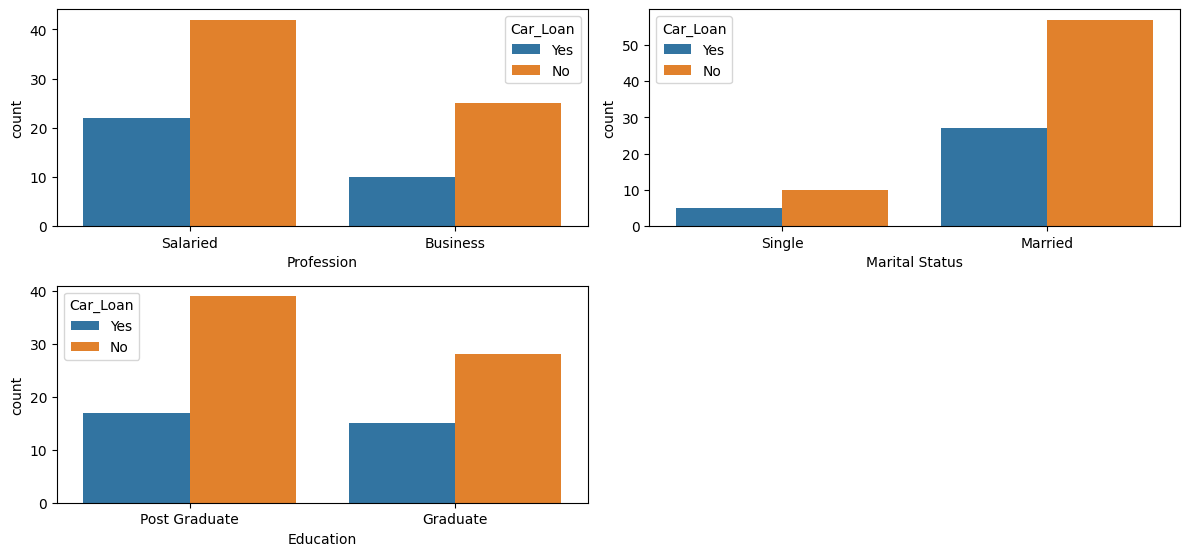

In [11]:
plt.figure(figsize = (12,8))
for i in range(len(cat_cols[:-1])):
  plt.subplot(3,2,i+1)
  sns.countplot(data = df,x = cat_cols[i],hue = 'Car_Loan')
plt.tight_layout()
plt.show()

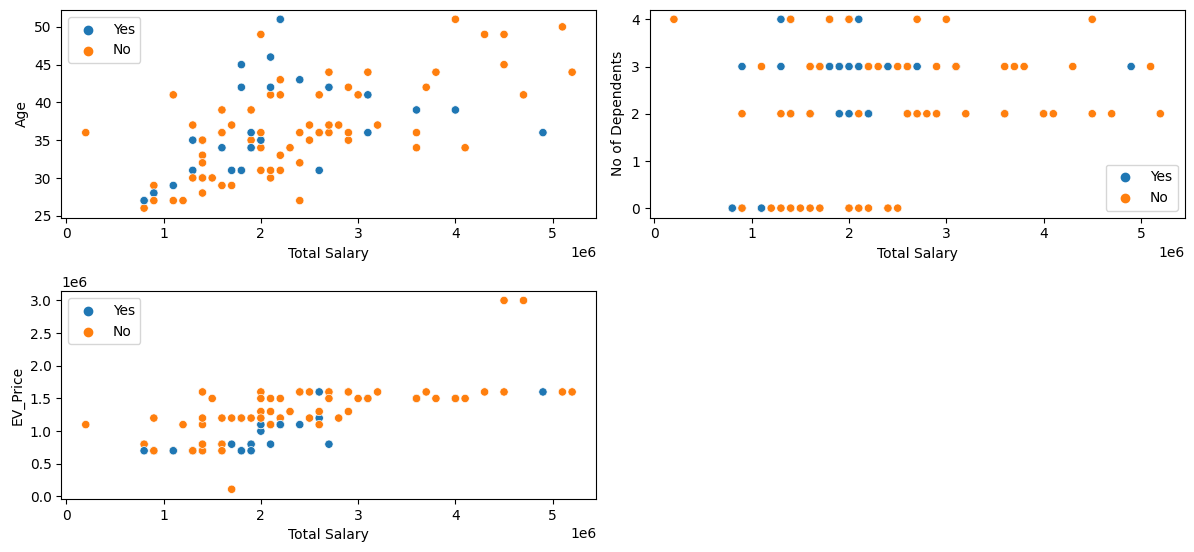

In [12]:
plt.figure(figsize = (12,8))
plt.subplot(3,2,1)
sns.scatterplot(data = df,x = 'Total Salary',y = 'Age',hue = 'Car_Loan')
plt.legend(loc = 'best')
plt.subplot(3,2,2)
sns.scatterplot(data = df,x = 'Total Salary',y = 'No of Dependents',hue = 'Car_Loan')
plt.legend(loc = 'lower right')
plt.subplot(3,2,3)
sns.scatterplot(data = df,x = 'Total Salary',y = 'EV_Price',hue = 'Car_Loan')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

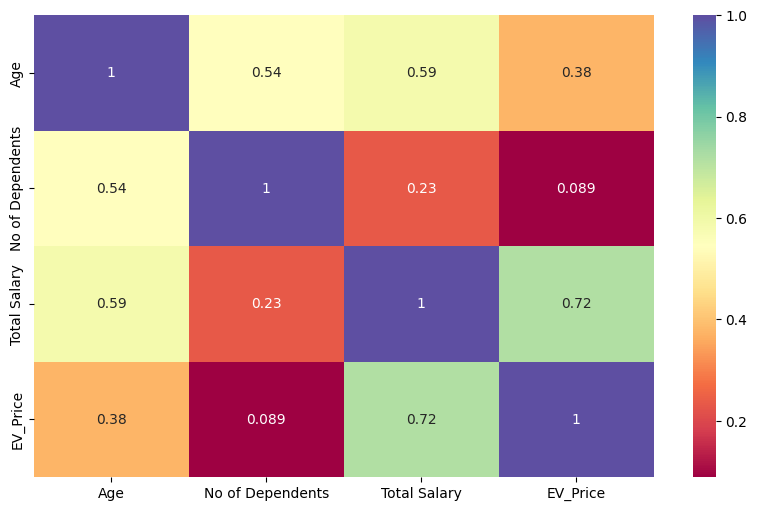

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,cmap = 'Spectral')
plt.show()

## Behavioral Analysis

In [14]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
df.head(3)

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000


In [16]:
# cl_feat = df.columns.tolist()
cl_data = df.values

In [17]:
cl_data[:,0] = cl_data[:,0].astype(float)
cl_data[:,4] = cl_data[:,4].astype(float)
cl_data[:,6] = cl_data[:,6].astype(float)
cl_data[:,7] = cl_data[:,7].astype(float)

In [18]:
cl_data[:3]

array([[27.0, 'Salaried', 'Single', 'Post Graduate', 0.0, 'Yes',
        800000.0, 800000.0],
       [35.0, 'Salaried', 'Married', 'Post Graduate', 2.0, 'Yes',
        2000000.0, 1000000.0],
       [45.0, 'Business', 'Married', 'Graduate', 4.0, 'Yes', 1800000.0,
        1200000.0]], dtype=object)

Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 3
Best run was number 1
Best run was number 5


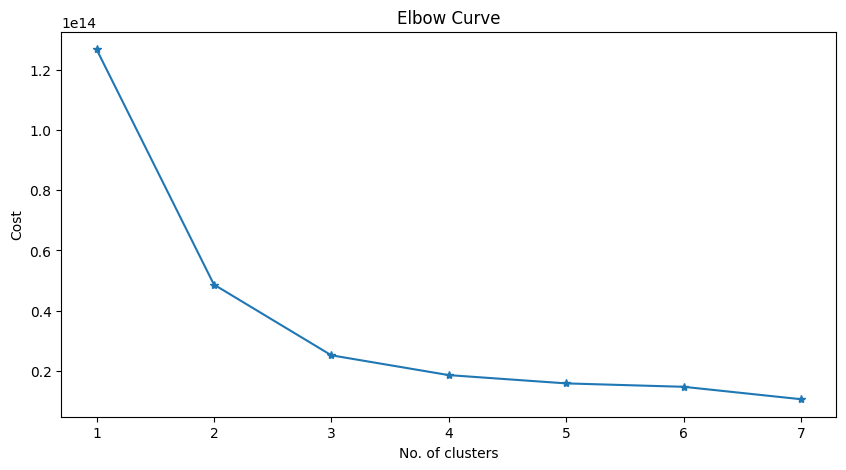

In [19]:
# Finding optimal number of clusters for KPrototypes

cost = []
K = range(1,8)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters,verbose = 2,n_jobs = -1,init = 'cao', random_state = 0, n_init = 5)
    kproto.fit_predict(cl_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.figure(figsize = (10,5))
plt.plot(K,cost,'*-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

According to the scree plot of the cost function above, we consider choosing the number of cluster k = 3. It will be the optimal number of clusters for K-Prototype cluster analysis.

In [20]:
kproto = KPrototypes(n_clusters = 3,verbose = 2,max_iter = 20,init = 'cao',n_jobs = -1,random_state = 0, n_init = 5)
clusters = kproto.fit_predict(cl_data, categorical=[1,2,3,5])

Best run was number 1


In [21]:
print(kproto.cluster_centroids_)

[['32.48780487804878' '1.9024390243902438' '1378048.780487805'
  '856341.4634146341' 'Salaried' 'Married' 'Post Graduate' 'No']
 ['42.2' '2.533333333333333' '4240000.0' '1740000.0' 'Salaried' 'Married'
  'Post Graduate' 'No']
 ['37.906976744186046' '2.3255813953488373' '2434883.7209302327'
  '1325581.3953488371' 'Salaried' 'Married' 'Post Graduate' 'No']]


In [22]:
cl_dict = []
for i in clusters:
  cl_dict.append(i)

In [23]:
df['Clusters'] = cl_dict
df.head()

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,2
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,0
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,2


In [24]:
df['Clusters'].value_counts()

2    43
0    41
1    15
Name: Clusters, dtype: int64

In [25]:
df['EV_Price'].mean()

1194040.4040404041

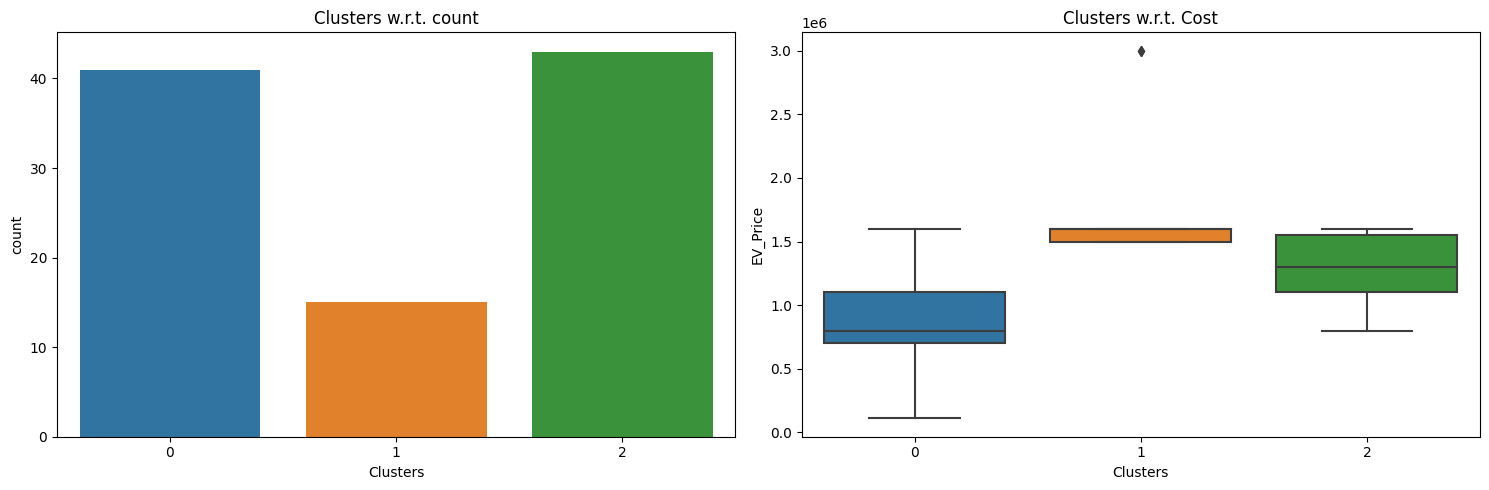

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data = df,x = 'Clusters')
plt.title('Clusters w.r.t. count')
plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'Clusters',y = 'EV_Price')
plt.title('Clusters w.r.t. Cost')
plt.tight_layout()
plt.show()

In [27]:
df[df['Clusters'] == 0].describe().T[['count','min','max','mean']]

,count,min,max,mean
Age,41.0,26.0,45.0,3.248780e+01
No of Dependents,41.0,0.0,4.0,1.902439e+00
Total Salary,41.0,200000.0,1900000.0,1.378049e+06
EV_Price,41.0,110000.0,1600000.0,8.563415e+05
Clusters,41.0,0.0,0.0,0.000000e+00


In [28]:
df[df['Clusters'] == 1].describe().T[['count','min','max','mean']]

,count,min,max,mean
Age,15.0,34.0,51.0,4.220000e+01
No of Dependents,15.0,2.0,4.0,2.533333e+00
Total Salary,15.0,3600000.0,5200000.0,4.240000e+06
EV_Price,15.0,1500000.0,3000000.0,1.740000e+06
Clusters,15.0,1.0,1.0,1.000000e+00


In [29]:
df[df['Clusters'] == 2].describe().T[['count','min','max','mean']]

,count,min,max,mean
Age,43.0,27.0,51.0,3.790698e+01
No of Dependents,43.0,0.0,4.0,2.325581e+00
Total Salary,43.0,1900000.0,3200000.0,2.434884e+06
EV_Price,43.0,800000.0,1600000.0,1.325581e+06
Clusters,43.0,2.0,2.0,2.000000e+00


In [30]:
df.head(2)

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,2


In [31]:
num_cols

Index(['Age', 'No of Dependents', 'Total Salary', 'EV_Price'], dtype='object')

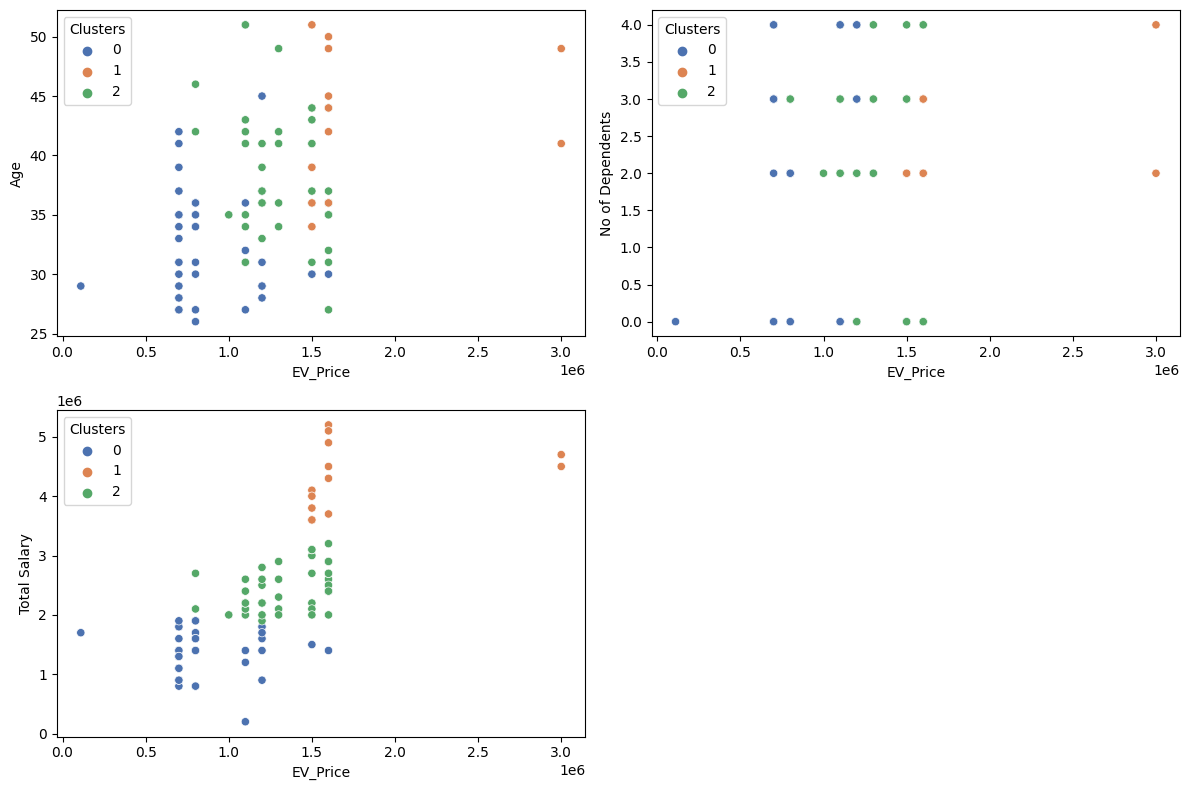

In [32]:
plt.figure(figsize = (12,8))
for i in range(len(num_cols[:-1])):
  plt.subplot(len(num_cols)//2,2,i+1)
  sns.scatterplot(data = df,x = 'EV_Price',y = num_cols[i],hue = 'Clusters', palette="deep")
  # plt.title()
  plt.tight_layout()
plt.show()

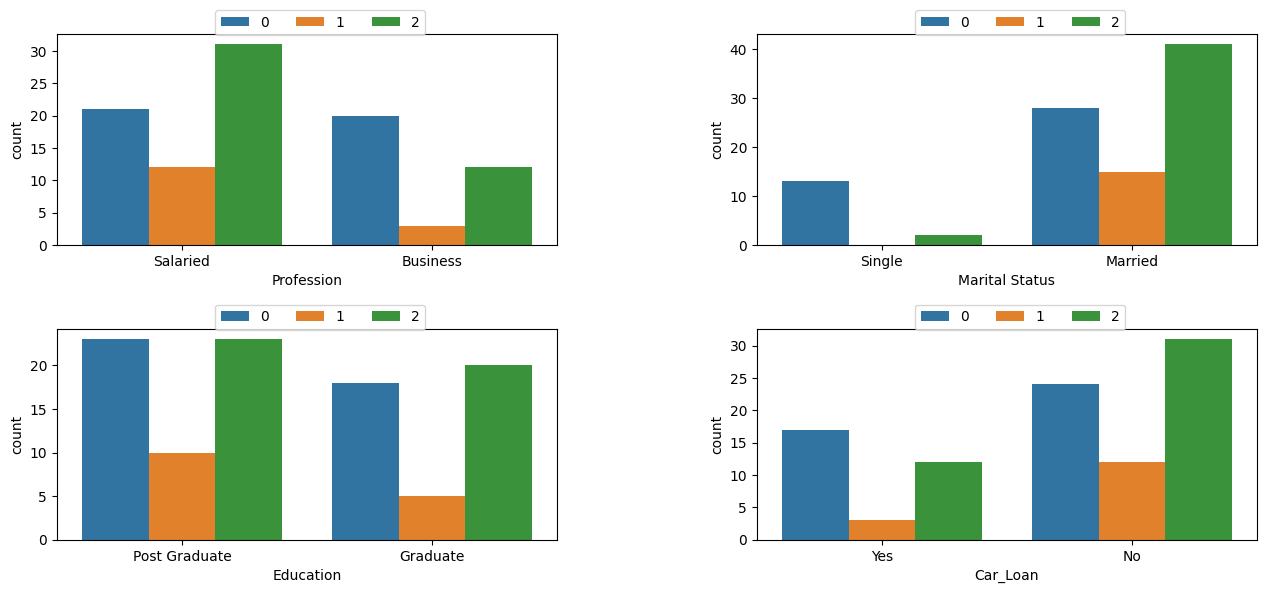

In [33]:
plt.figure(figsize = (15,10))
for i in range(len(cat_cols)):
  plt.subplot(3,2,i+1)
  sns.countplot(data = df,x = cat_cols[i],hue = 'Clusters')
  plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 3)
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()